In [133]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import dabl
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler # Normalizamos
from sklearn.tree import DecisionTreeClassifier # Importamos el modelo de Arbol de Decisiones 
from sklearn.pipeline import Pipeline # Automatizar
from sklearn.model_selection import GridSearchCV # Realizar cross-validation
from sklearn.ensemble import RandomForestClassifier # Importamos el Modelo de Random Forest
from sklearn.metrics import classification_report, accuracy_score # Métricas de precisión y performance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score #Grafica CM

In [134]:
# Cargamos datos
data = pd.read_csv("pinguinos.csv")
data.head(10)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [135]:
# No vamos a imputar datos nulos, solo con lo que esta lleno
data = data.dropna()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [136]:
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


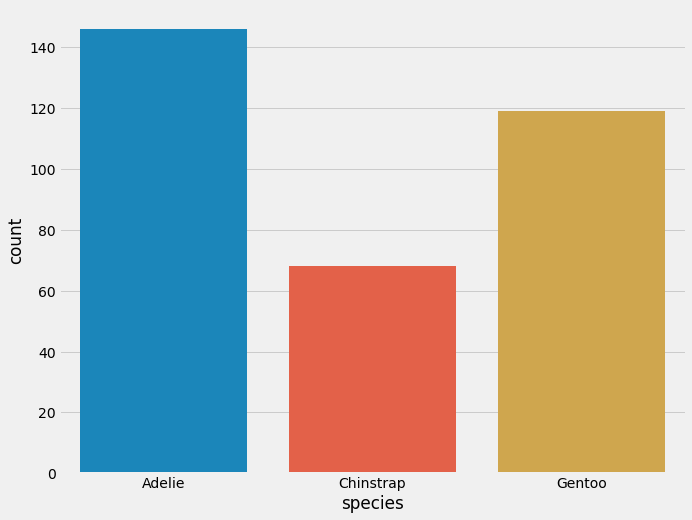

In [137]:
plt.figure(figsize = (10, 8))
sns.countplot(data['species'])
plt.show()

In [138]:
# Creo el diccionario para etiquetar el especie de pinguino
mappings = {'Adelie':'1', 'Gentoo':'2','Chinstrap':'3'}
data['species'] = data['species'].replace(mappings)
data['species'] = data['species'].astype('int')
assert data['species'].dtype == 'int'
print(data['species'].describe())
data.head(10)

count    333.000000
mean       1.765766
std        0.767820
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: species, dtype: float64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,1,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,1,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,1,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,1,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,1,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,1,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,1,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,1,Torgersen,34.6,21.1,198.0,4400.0,MALE


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


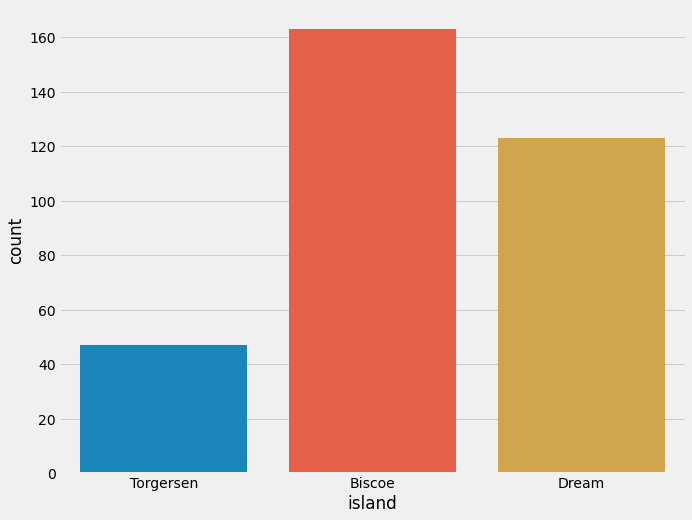

In [139]:
plt.figure(figsize = (10, 8))
sns.countplot(data['island'])
plt.show()

In [140]:
# Creo el diccionario para etiquetar la isla de pinguino
mappings = {'Biscoe':'1', 'Dream':'2','Torgersen':'3'}
data['island'] = data['island'].replace(mappings)
data['island'] = data['island'].astype('int')
assert data['island'].dtype == 'int'
print(data['island'].describe())
data.head(10)

count    333.000000
mean       1.651652
std        0.714715
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: island, dtype: float64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,3,39.1,18.7,181.0,3750.0,MALE
1,1,3,39.5,17.4,186.0,3800.0,FEMALE
2,1,3,40.3,18.0,195.0,3250.0,FEMALE
4,1,3,36.7,19.3,193.0,3450.0,FEMALE
5,1,3,39.3,20.6,190.0,3650.0,MALE
6,1,3,38.9,17.8,181.0,3625.0,FEMALE
7,1,3,39.2,19.6,195.0,4675.0,MALE
12,1,3,41.1,17.6,182.0,3200.0,FEMALE
13,1,3,38.6,21.2,191.0,3800.0,MALE
14,1,3,34.6,21.1,198.0,4400.0,MALE


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


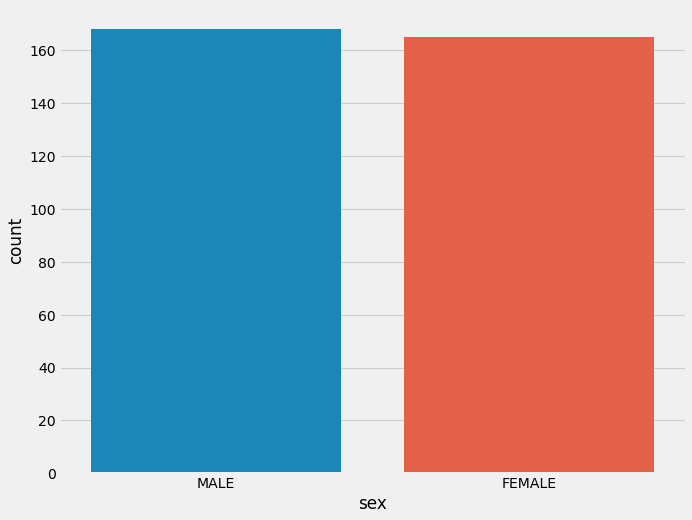

In [141]:
plt.figure(figsize = (10, 8))
sns.countplot(data['sex'])
plt.show()

In [142]:
# Creo etiqueta para sexo de pinguino -1 Masculino , 1 Femenino
data['sex']= data['sex'].apply(lambda x:-1 if x=='MALE' else 1)
print(data['sex'].describe())
data.head(10)


count    333.000000
mean      -0.009009
std        1.001464
min       -1.000000
25%       -1.000000
50%       -1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,3,39.1,18.7,181.0,3750.0,-1
1,1,3,39.5,17.4,186.0,3800.0,1
2,1,3,40.3,18.0,195.0,3250.0,1
4,1,3,36.7,19.3,193.0,3450.0,1
5,1,3,39.3,20.6,190.0,3650.0,-1
6,1,3,38.9,17.8,181.0,3625.0,1
7,1,3,39.2,19.6,195.0,4675.0,-1
12,1,3,41.1,17.6,182.0,3200.0,1
13,1,3,38.6,21.2,191.0,3800.0,-1
14,1,3,34.6,21.1,198.0,4400.0,-1


In [143]:
data.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int32  
 1   island             333 non-null    int32  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int32(2), int64(1)
memory usage: 18.2 KB


In [144]:
#Cabecera Final
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,3,39.1,18.7,181.0,3750.0,-1
1,1,3,39.5,17.4,186.0,3800.0,1
2,1,3,40.3,18.0,195.0,3250.0,1
4,1,3,36.7,19.3,193.0,3450.0,1
5,1,3,39.3,20.6,190.0,3650.0,-1


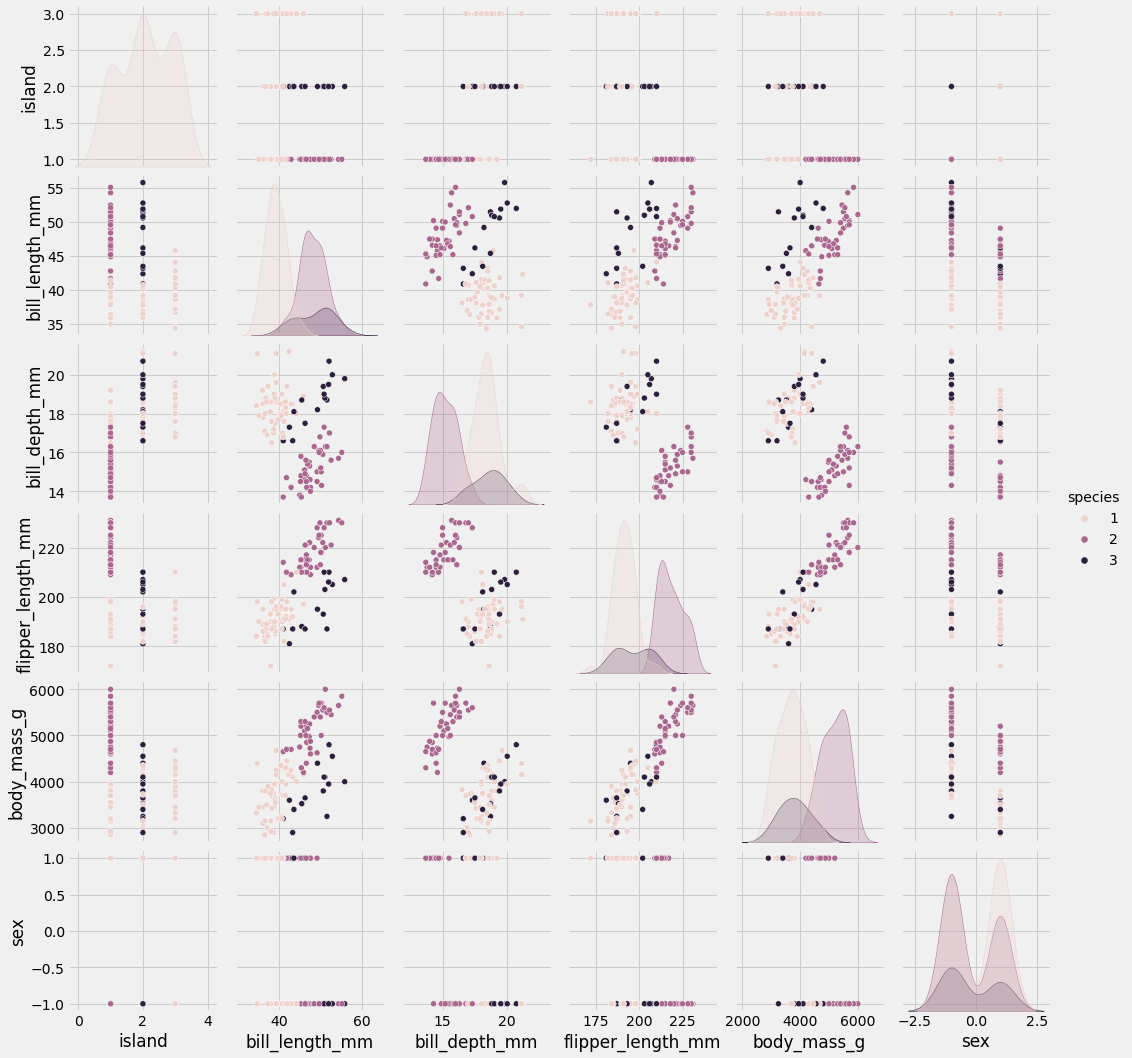

In [145]:
# Exploración de la relación entre variables
sns.pairplot(
   data.sample(100), hue="species"
); # ploteamos sobre una muestra

Target looks like classification
Linear Discriminant Analysis training set score: 0.983


c:\ProgramData\Anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
c:\ProgramData\Anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


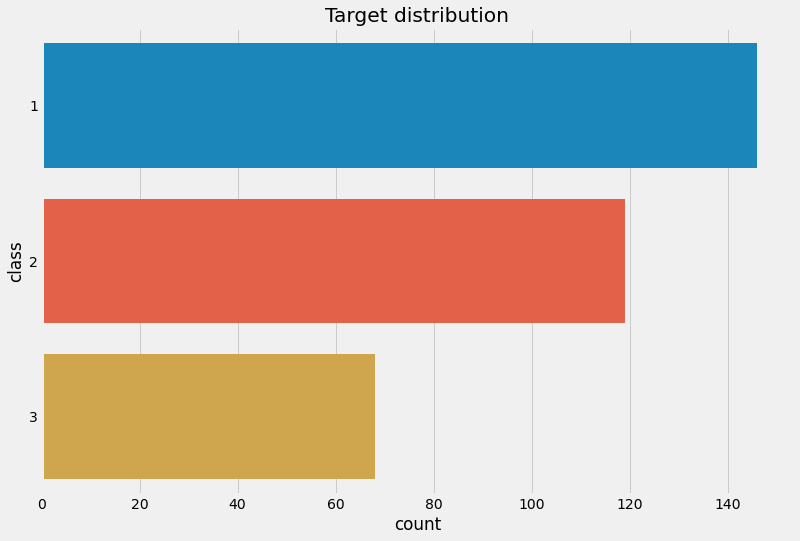

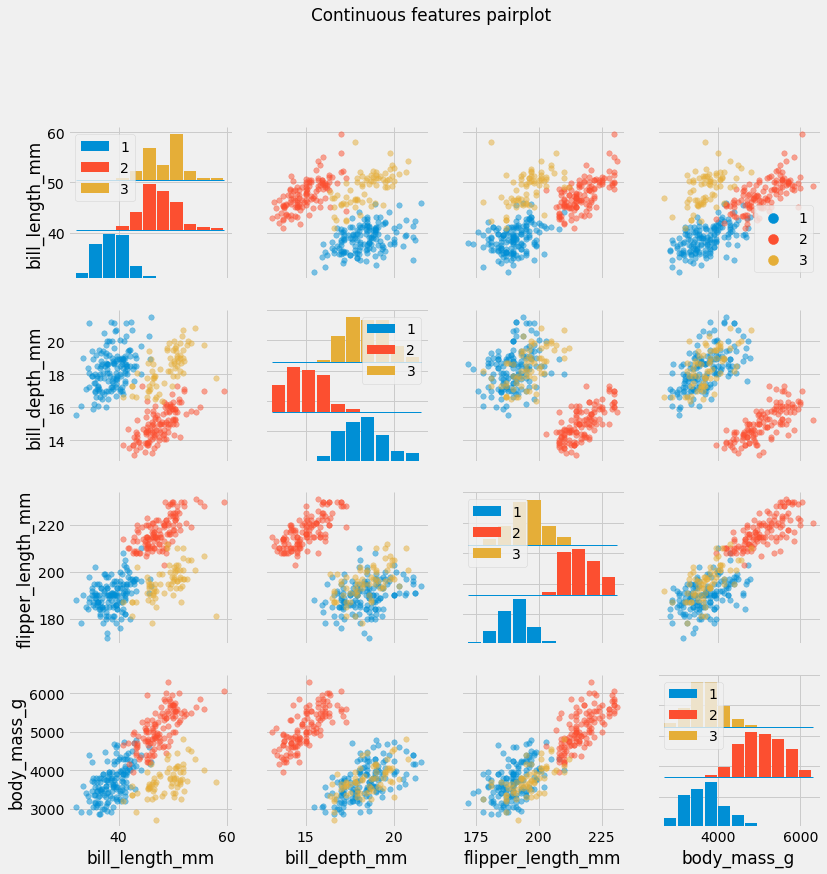

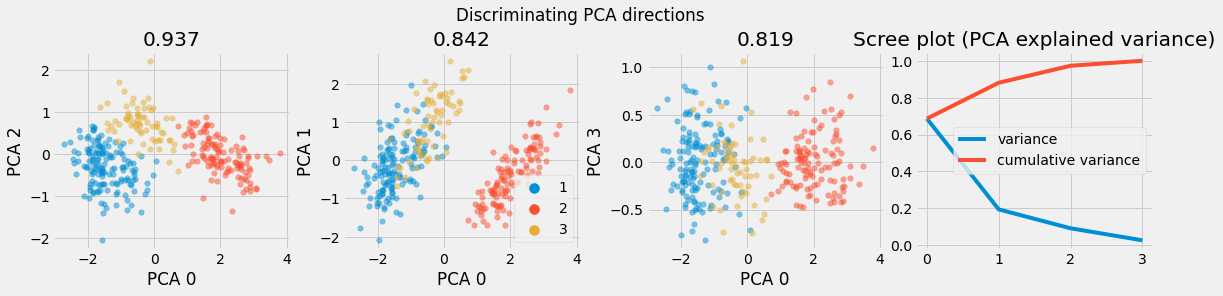

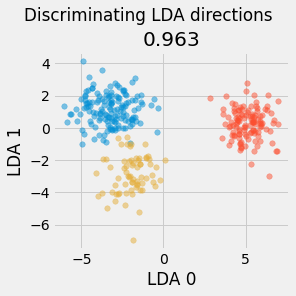

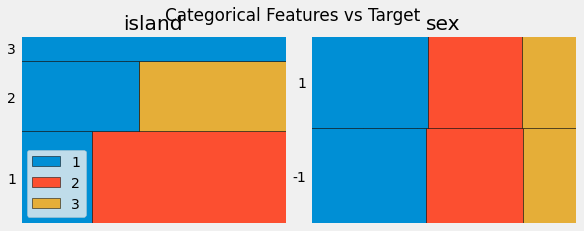

In [146]:
# DABL
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col='species')
plt.show();

In [147]:
#Set de Entrenamiento y prueba
TARGET = 'species'
# Variables predictoras
X = data.loc[:, data.columns != TARGET]
# Variable objetivo
y = data[TARGET].values

# Realizamos el Split utilizando la función de sklearn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,stratify=y
)



In [148]:
#ARBOL DE DECISION

# Pipeline
tree_clf = Pipeline([
  ('scale', MinMaxScaler()), # Scaler
  ('tree_clf', DecisionTreeClassifier())]  # Modelo Arbol de Decision
  )

scoring = "accuracy" # métrica a optimizar
cv = 4 # Número de rondas de cross validation

# Parámetros para probar diferentes hiperparametros del modelo Arbol de Decision
param_grid = [
  {'tree_clf__max_depth': [3, 10, 100]}  # probaremos diferentes hiperparametros de regularización
 ]

# Realizamos el modelo con cross-validation y buscamos los parámetros óptimos
grid = GridSearchCV(tree_clf, cv=cv, param_grid=param_grid, scoring=scoring, n_jobs=-1)
grid.fit(X_train, y_train) # Entrenamos  

# Imprimimos resultados
print(f"Resultados para {scoring}")
print("Mejor: %f utilizando %s" % (grid.best_score_, 
    grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Media de Score: {mean}, Des.Std: {stdev}  Con parametros: {param}")

Resultados para accuracy
Mejor: 0.944112 utilizando {'tree_clf__max_depth': 100}
Media de Score: 0.9270163646990064, Des.Std: 0.014392539163992862  Con parametros: {'tree_clf__max_depth': 3}
Media de Score: 0.9228521332554063, Des.Std: 0.04454709298391295  Con parametros: {'tree_clf__max_depth': 10}
Media de Score: 0.9441116306253653, Des.Std: 0.022538788708244002  Con parametros: {'tree_clf__max_depth': 100}


In [149]:
# Hacemos la predicción para el Set de prueba 
m_best = grid.best_estimator_ # Utilizamos el mejor estimador
y_pred = m_best.predict(X_test) # predicimos con predict

# Imprimimos los resultados del modelo
print (pd.crosstab(y_test,y_pred,
                   rownames = ['Actual'],
                   colnames = ['Preddición']))

print(f'Accuracy: {round(accuracy_score(y_pred, y_test),3)}')
print("-----------------------")
print("Reporte Detallado: ")

print(classification_report(y_test, y_pred,))

Preddición   1   2   3
Actual                
1           42   0   2
2            1  35   0
3            1   0  19
Accuracy: 0.96
-----------------------
Reporte Detallado: 
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        44
           2       1.00      0.97      0.99        36
           3       0.90      0.95      0.93        20

    accuracy                           0.96       100
   macro avg       0.95      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



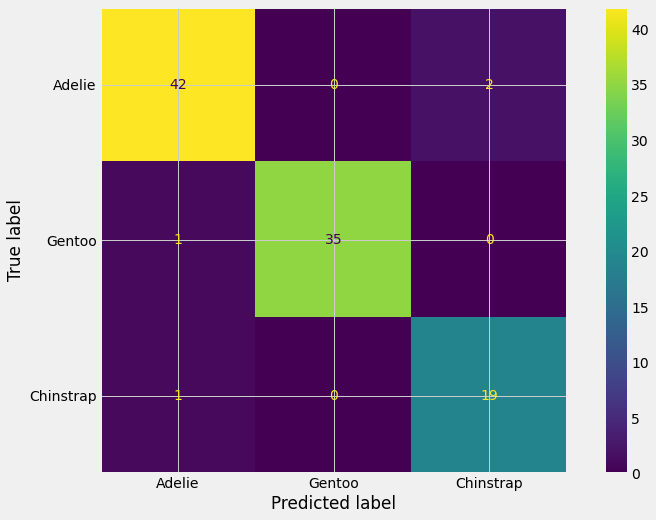

In [150]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Adelie','Gentoo','Chinstrap'])
disp.plot()


In [151]:

# Pipeline
rf_clf = Pipeline([
  ('scale', MinMaxScaler()), # Scaler
  ('rf_clf', ensemble.RandomForestClassifier())]  # Modelo Random Forest
)

# Parámetros para probar diferentes hiperparametros del modelo 
param_grid = [
  {
      'rf_clf__n_estimators': [100, 200, 400],
      'rf_clf__min_samples_leaf' : [2, 4],
      'rf_clf__min_samples_split': [5, 10, 15]
    } # probaremos diferentes hiperparametros del RF
 ]

# Realizamos el modelo con cross-validation y buscamos los parámetros óptimos
grid = GridSearchCV(rf_clf, cv=cv, param_grid=param_grid, scoring=scoring, n_jobs = -1)
grid.fit(X_train, y_train) # Entrenamos  

# Imprimimos resultados
print(f"Resultados para {scoring}")
print("Mejor: %f utilizando %s" % (grid.best_score_, 
    grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Media de Score: {mean}, Des.Std: {stdev}  Con parametros: {param}")

Resultados para accuracy
Mejor: 0.974211 utilizando {'rf_clf__min_samples_leaf': 2, 'rf_clf__min_samples_split': 15, 'rf_clf__n_estimators': 200}
Media de Score: 0.9742109877264757, Des.Std: 0.014974127032015415  Con parametros: {'rf_clf__min_samples_leaf': 2, 'rf_clf__min_samples_split': 5, 'rf_clf__n_estimators': 100}
Media de Score: 0.9655902980713034, Des.Std: 0.021176235475200395  Con parametros: {'rf_clf__min_samples_leaf': 2, 'rf_clf__min_samples_split': 5, 'rf_clf__n_estimators': 200}
Media de Score: 0.9655902980713034, Des.Std: 0.017314744255678215  Con parametros: {'rf_clf__min_samples_leaf': 2, 'rf_clf__min_samples_split': 5, 'rf_clf__n_estimators': 400}
Media de Score: 0.9655902980713034, Des.Std: 0.021176235475200395  Con parametros: {'rf_clf__min_samples_leaf': 2, 'rf_clf__min_samples_split': 10, 'rf_clf__n_estimators': 100}
Media de Score: 0.9655902980713034, Des.Std: 0.021176235475200395  Con parametros: {'rf_clf__min_samples_leaf': 2, 'rf_clf__min_samples_split': 10, '

In [152]:
# Hacemos la predicción para el Set de prueba 
m_best = grid.best_estimator_ # Utilizamos el mejor estimador
y_pred = m_best.predict(X_test) # predicimos con predict

# Imprimimos los resultados del modelo
print (pd.crosstab(y_test,y_pred,
                   rownames = ['Actual'],
                   colnames = ['Preddición']))

print(f'Accuracy: {round(accuracy_score(y_pred, y_test),3)}')
print("-----------------------")
print("Reporte Detallado: ")

print(classification_report(y_test, y_pred,))

Preddición   1   2   3
Actual                
1           44   0   0
2            0  36   0
3            0   0  20
Accuracy: 1.0
-----------------------
Reporte Detallado: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        20

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



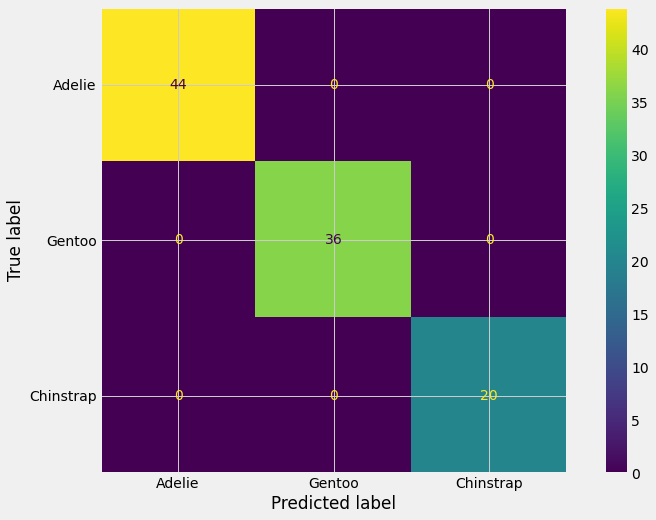

In [153]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Adelie','Gentoo','Chinstrap'])
disp.plot()